###  TODO: SAVE AND LOAD NEW DATASET... UN COP FET SERA PICO Y PALA

In [1]:
# This line solves some minor problems when you do not have propery set the PYTHONPATH
exec(compile(open("./fix_paths.py", "rb").read(), "./fix_paths.py", 'exec'))

import numpy as np
import scipy.ndimage.filters as fi
import pandas as pd
import time
from concurrent import futures 
from common import dataset_loaders

class_to_index = {0:0,1:1,2:2,3:3,4:4}
class_circle_min_value   = {0:0.3,1:0.4,2:0.5,3:0.7,4:0.8}
NUM_CLASSES = len(list(class_to_index.keys()))

def get_circles(class_circle_min_value):
    def get_circle(min_value, nsig=10):
        """Returns a 2D Gaussian kernel array normalized to the maximum of the response"""
        imp_resp = np.zeros([50,50]); 
        imp_resp[int(imp_resp.shape[0]/2),int(imp_resp.shape[1]/2)] = 1 ; 
        z = fi.gaussian_filter(imp_resp, nsig)
        z /= z.max()
        return z >= min_value
    return np.array([get_circle(class_circle_min_value[i]) for i in range(len(class_circle_min_value))], dtype='float32')

circles = get_circles(class_circle_min_value)


def get_labels_delta_mask(img, label):
    rec_im = np.zeros([img.shape[0], img.shape[1], NUM_CLASSES+1])
    for i in labels.index.values:
        row = labels.ix[i]
        if  row.x-int(circles.shape[1]/2) >= 0 and row.x+int(circles.shape[1]/2) < img.shape[0] and \
            row.y-int(circles.shape[1]/2) >= 0 and row.y+int(circles.shape[2]/2) < img.shape[1]:        
            rec_im[row.x-int(circles.shape[1]/2):row.x+int(circles.shape[2]/2),
                   row.y-int(circles.shape[1]/2):row.y+int(circles.shape[2]/2),
                   class_to_index[row['class']]] += circles[row['class'],:,:]
            
    rec_im = (rec_im >= 1).astype(np.float32)
    rec_im[:,:,-1] = 1-rec_im.max(axis=2)
    return rec_im.argmax(axis=2).astype(np.float32)



In [20]:

import scipy.misc

casenames = dataset_loaders.get_casenames()
for icase, casename in enumerate(casenames):
    print("%d out of %d" % (icase, len(casenames)))
    img = dataset_loaders.load_image(casename)
    df = dataset_loaders.groundlabels_dataframe()

    if int(casename) in df['image'].unique():
        labels = df[df['image'] == int(casename)]
        lab_dens = get_labels_delta_mask(img, labels)

        for i in range(0,img.shape[0],500):
            for j in range(0, img.shape[1], 500):
                now_labs = lab_dens[i:i+500,j:j+500]
                if (now_labs != 5).sum() > 0: # hay algun label que no sea 0?
                    filepath = '/home/jose/tech/ml_projects/data_models/sealions_contest/new_dataset_only_lions'
                    filename = '%d_%d_%s'%(i,j,casename)
                    f = open('%s/%s' % (filepath, filename),'wb')
                    np.save(f, now_labs)
                    np.save(f, img[i:i+500,j:j+500,:])
                    f.close()
                    #scipy.misc.toimage(img[i:i+500,j:j+500,:], cmin=0.0, cmax=1).save('%s_img.jpg' % filename)
                    #scipy.misc.toimage(now_labs, cmin=0.0, cmax=5).save('%s_mask.jpg' % filename)
                    os.system('tar -czvf %s/%s.tar.gz %s/%s' % (filepath, filename, filepath, filename))
                    os.system('rm %s/%s' % (filepath, filename))
    del img

0 out of 948
1 out of 948
2 out of 948
3 out of 948
4 out of 948
5 out of 948
6 out of 948
7 out of 948
8 out of 948
9 out of 948
10 out of 948
11 out of 948
12 out of 948
13 out of 948
14 out of 948
15 out of 948
16 out of 948
17 out of 948
18 out of 948
19 out of 948
20 out of 948
21 out of 948
22 out of 948
23 out of 948
24 out of 948
25 out of 948
26 out of 948
27 out of 948
28 out of 948
29 out of 948
30 out of 948
31 out of 948
32 out of 948
33 out of 948
34 out of 948
35 out of 948
36 out of 948
37 out of 948
38 out of 948
39 out of 948
40 out of 948
41 out of 948
42 out of 948
43 out of 948
44 out of 948
45 out of 948
46 out of 948
47 out of 948
48 out of 948
49 out of 948
50 out of 948
51 out of 948
52 out of 948
53 out of 948
54 out of 948
55 out of 948
56 out of 948
57 out of 948
58 out of 948
59 out of 948
60 out of 948
61 out of 948
62 out of 948
63 out of 948
64 out of 948
65 out of 948
66 out of 948
67 out of 948
68 out of 948
69 out of 948
70 out of 948
71 out of 948
72

554 out of 948
555 out of 948
556 out of 948
557 out of 948
558 out of 948
559 out of 948
560 out of 948
561 out of 948
562 out of 948
563 out of 948
564 out of 948
565 out of 948
566 out of 948
567 out of 948
568 out of 948
569 out of 948
570 out of 948
571 out of 948
572 out of 948
573 out of 948
574 out of 948
575 out of 948
576 out of 948
577 out of 948
578 out of 948
579 out of 948
580 out of 948
581 out of 948
582 out of 948
583 out of 948
584 out of 948
585 out of 948
586 out of 948
587 out of 948
588 out of 948
589 out of 948
590 out of 948
591 out of 948
592 out of 948
593 out of 948
594 out of 948
595 out of 948
596 out of 948
597 out of 948
598 out of 948
599 out of 948
600 out of 948
601 out of 948
602 out of 948
603 out of 948
604 out of 948
605 out of 948
606 out of 948
607 out of 948
608 out of 948
609 out of 948
610 out of 948
611 out of 948
612 out of 948
613 out of 948
614 out of 948
615 out of 948
616 out of 948
617 out of 948
618 out of 948
619 out of 948
620 out of

Populating the interactive namespace from numpy and matplotlib


/home/jose/tech/anaconda3/envs/kgsealions/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power', 'fft', 'linalg', 'random', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


([array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.

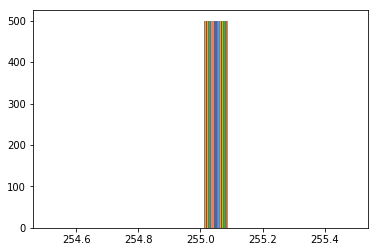

In [32]:
from pylab import *
%pylab inline
mask = scipy.misc.imread('/home/jose/tech/ml_projects/data_models/sealions_contest/new_dataset_only_lions/2500_5500_878_mask.jpg')
hist(mask)

In [ ]:
casename = dataset_loaders.get_casenames()[1]
img = dataset_loaders.load_image(casename)
df = dataset_loaders.groundlabels_dataframe()
labels = df[df['image'] == int(casename)]
lab_dens = get_labels_delta_mask(img, labels)

from pylab import *
%pylab inline
figure(figsize(20,20))

for i in range(5):
    labs_plot = np.copy(lab_dens[1000:1500,3000:3500])
    labs_plot[labs_plot != i] = np.nan
    subplot(321+i)
    imshow(img[1000:1500,3000:3500,:])
    imshow(labs_plot, alpha = 0.3)
